# Exercise 01 : Line chart with styles

## Import

In [1]:
import pandas as pd
import sqlite3

## Connect to database

In [2]:
db_connect = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

## Get all visit datetimes from `pageviews` table

In [3]:
sql_query = """
SELECT
    datetime
FROM
    pageviews
WHERE
    uid LIKE 'user_%'
"""

pageviews_datetimes_df = pd.read_sql(sql=sql_query, con=db_connect, parse_dates=['datetime'])
pageviews_datetimes_df.head()

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144


In [4]:
pageviews_datetimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  987 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.8 KB


## Get all commit datetimes from `checker` table

In [5]:
sql_query = """
SELECT
    timestamp as datetime
FROM
    checker
WHERE
    uid LIKE 'user_%'
"""

commits_datetimes_df = pd.read_sql(sql=sql_query, con=db_connect, parse_dates=['datetime'])
commits_datetimes_df.head()

,datetime
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


In [6]:
commits_datetimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  3207 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 25.2 KB


## Count visits per date

In [7]:
pageviews_per_day_df = pageviews_datetimes_df.groupby(by=[pageviews_datetimes_df['datetime'].dt.date]).count()
pageviews_per_day_df.rename(columns={'datetime': 'views'}, inplace=True)
pageviews_per_day_df.head()

,views
datetime,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


In [8]:
pageviews_per_day_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 2020-04-17 to 2020-05-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   views   33 non-null     int64
dtypes: int64(1)
memory usage: 528.0+ bytes


## Count commits per date

In [9]:
commits_per_day_df = commits_datetimes_df.groupby(by=[commits_datetimes_df['datetime'].dt.date]).count()
commits_per_day_df.rename(columns={'datetime': 'commits'}, inplace=True)
commits_per_day_df.head()

,commits
datetime,
2020-04-17,23
2020-04-18,69
2020-04-19,33
2020-04-20,25
2020-04-21,25


In [10]:
statistics_per_day = pageviews_per_day_df.join(commits_per_day_df, on='datetime', how='inner')
statistics_per_day.head()

,views,commits
datetime,,
2020-04-17,1,23
2020-04-18,23,69
2020-04-19,15,33
2020-04-21,3,25
2020-04-22,1,28


In [11]:
statistics_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 2020-04-17 to 2020-05-21
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   views    32 non-null     int64
 1   commits  32 non-null     int64
dtypes: int64(2)
memory usage: 768.0+ bytes


<AxesSubplot: title={'center': 'Views and commits per day'}, xlabel='datetime'>

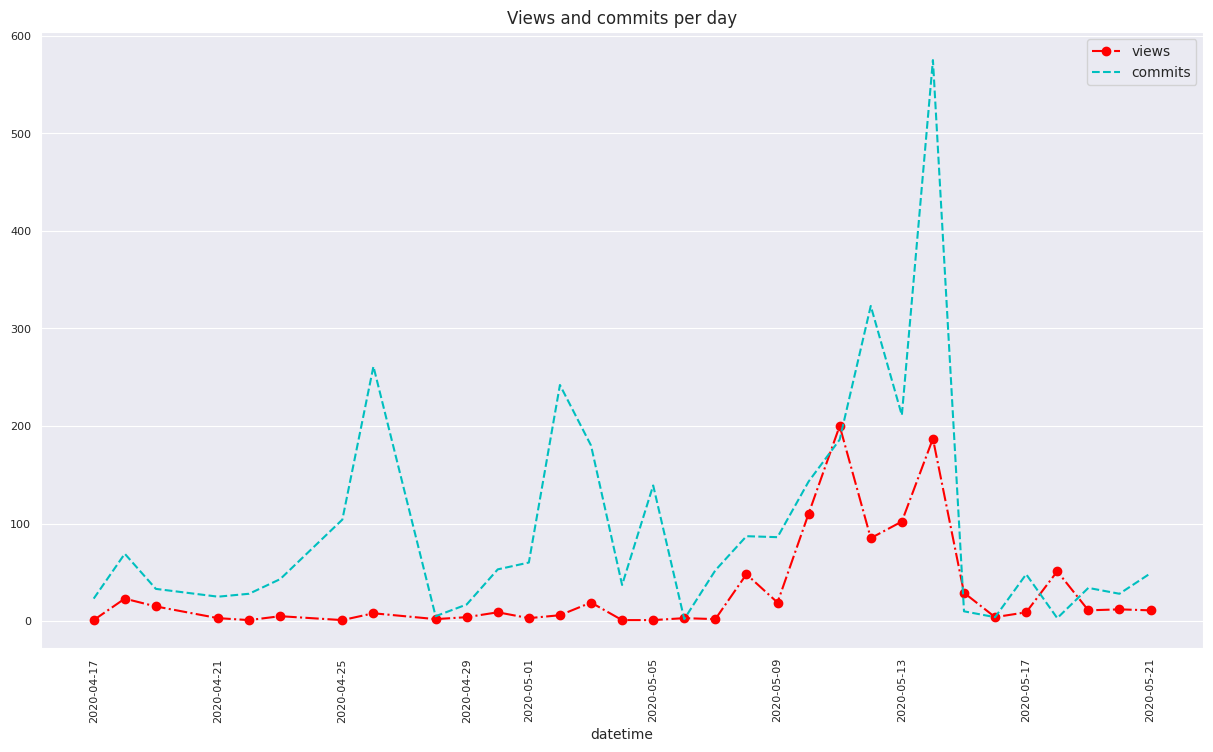

In [12]:
plt = statistics_per_day.plot(figsize=(15, 8), fontsize=8, title='Views and commits per day', rot=90, style={'views': 'r.-.', 'commits': 'c--'}, markersize=12)
plt.grid(axis='x')
plt

## Close the connection to the database

In [13]:
db_connect.close()

## How many times was the number of views larger than 150?

### The answer is 2